# From Raw Data to LLM Apps

Augment the retrieval capabilities of your LLM app by providing different sources of data. Metal handles the heavy lifting of parsing and data processing of various data types. 

## Step 1: Set up your Metal account

In [5]:
import pandas as pd
from dotenv import load_dotenv
from metal_sdk.metal import Metal
import os
load_dotenv()

False

In [4]:
api_key= os.environ['METAL_API_KEY']
client_id= os.environ['METAL_CLIENT_ID']
index_id = os.environ['METAL_INDEX_ID']

metal = Metal(api_key, client_id)

## Step 2: Create a Datasource

A Datasource is the collection of all the files we want to add to our chatbot to augment its responses.  

In [43]:
payload = {
    "name": "Women World Cup 2023 Datasources",
    "sourcetype": "File",
    "autoExtract": True,
    "metadataFields": [],   
}

datasource = metal.add_datasource(payload)
datasource

{'data': {'id': '651de6fb1037798405d1bbf1',
  'createdAt': '2023-10-04T22:28:11.843Z',
  'createdBy': '63ff8b89b2fb5e9acd736043',
  'name': 'Women World Cup 2023 Datasources',
  'metadataFields': [],
  'sourcetype': 'File',
  'autoExtract': True}}

1. Add datasource 
2. Connect Index to Datasource
3. Add data entities to Datasource

## Step 3: Add an Index and Connect it to a Datasource


In [44]:
datasource_id = datasource['data']['id']
datasource_id

'651de6fb1037798405d1bbf1'

In [45]:
datasource_id = datasource['data']['id']

payload = {
    "model": "text-embedding-ada-002",
    "name": "Woman World Cup 2023 Index",
    "datasource": datasource_id,
    "indexType": "HNSW",
    "dimensions": 1536
}

wwc_index = metal.add_index(payload)



## Step 4: Add Data Entities 



Any files that requires preprocessing will be added as a Data Entity to our Datasource. Here our system will automatically parse the documents, create the chunks and generate the embeddings that will be pushed to our Index. 
Let's start by adding our files in a directory and then add them to our Datasource.

In this case we are going to add in one go the following files to our Datasource:
- PDF with embedded tables and graphs
- DOCX with stats from FIFA
- XLSX with historic WC winners.
- CSV file with match results from the final rounds of the WC. 

For data that comes from more dynamic sources like an API we can ingest them directly to our Index. In this case:
- Wikipedia page of England's Goalkeeper, Mary Earps

In [46]:
import os

# Directory path
directory = "wwc"

# List all files in the directory
files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

# Add each file using the given method
for file in files:
    file_path = os.path.join(directory, file)
    results = metal.add_data_entity(datasource_id, file_path)
    # Depending on the return of the add_data_entity, you might want to do something with 'results' here

print(f"Added {len(files)} files from '{directory}'")


Added 4 files from 'wwc'


### Ingest our data directly into the index 

In [47]:
# Add player Bio via wikipedia API

from wikipediaapi import Wikipedia

wiki = Wikipedia('WorldCup23/0.0', 'en')
mc_page = wiki.page('Mariona_Caldentey').text
mc_page = mc_page.split('\nReferences\n')[0]

me_page = wiki.page('Mary_Earps').text
me_page = me_page.split('\nReferences\n')[0]





In [49]:
metal.index({ "text": me_page}, index_id =  wwc_index['data']['id'])

{'data': {'id': '651de72c0a49677a24a0f760',
  'text': 'Mary Alexandra Earps (born 7 March 1993) is an English professional footballer who plays as a goalkeeper for Manchester United in the Women\'s Super League and the England national team. At the 2023 FIFA Women\'s World Cup, she served as the vice captain for England, and received the Golden Glove award for best goalkeeper of the tournament.\nShe previously played for FA WSL clubs Bristol Academy, Birmingham City, Doncaster Belles, and Reading, and in the Bundesliga with VfL Wolfsburg. Earps has represented England at under-17, under-19, and under-23 levels, and won her first senior cap in 2017.\n\nClub career\nIn 2009–10 Earps was promoted to Leicester City\'s first team squad from the centre of excellence, to provide competition for regular goalkeeper Leanne Hall. The following season Earps signed for Nottingham Forest. She was an unused substitute in Forest\'s penalty shootout defeat by Barnet in the FA Women\'s Premier League Cu

## Step 5: Deploy the Metal AI Chatbot


Great job! We are now ready to test our chatbot. You can start by cloning the Metal Chatbot repo.  Just follow the steps outlined there, and in no time, you'll have a chatbot powered by the rich data from the 2023 FIFA Women's World Cup.

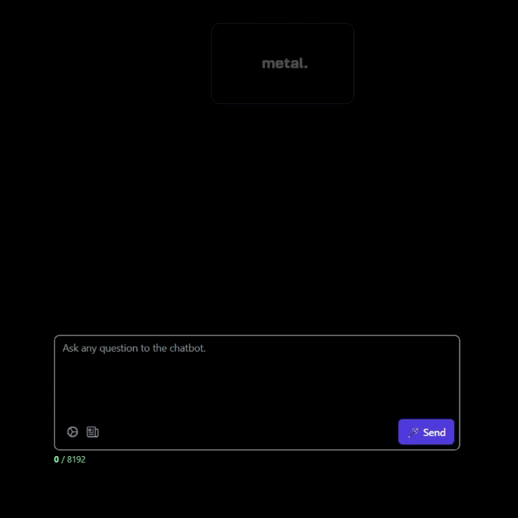

In [5]:
from IPython.display import display, Image
display(Image(filename="images/wwc_clip.gif"))